# Pymaceuticals Inc.
---

### Analysis

In this analysis, we evaluated the results of a range of drug regimens over 45 days on 248 unique mice. Based upon the research evaluations below we came to these conclusions:
- Ramicane has the lowest average tumor volume at 40.22(mm3) and Ketapril has the highest average tumor volume at 55.24(mm3).
- More than half of the mice were male.
- The most effective drug regimens are Capomulin, Ramicane, Infubinol, and Ceftamin based on the variance.
- Ramicane seems to be the most effective drug regimen with an average tumor volume of 40.21(mm3) and Capomulin coming in a close second with abn average tumor volume of 40.68(mm3).
- There is only one outlier in the data set and it is in the Infubinol regimen.
- Mouse m957 tumor saw a decrease in tumor volume from 45(mm3) to 33 (mm3) on Capomulin.
- In the Capomulin drug regimen we can correlate that the weight of a mouse is a contributor to the size of the tumor. The more a mouse ways the larger the tumor.

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = os.path.join('.', 'data', 'Mouse_metadata.csv')
study_results_path = os.path.join('.', 'data', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice = len(mouse_data_complete["Mouse ID"].unique())
unique_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = mouse_data_complete[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = mouse_data_complete[mouse_data_complete["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data_complete[mouse_data_complete["Mouse ID"] != 'g989']
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mice = len(clean_mouse_data["Mouse ID"].unique())
clean_unique_mice 

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(numeric_only=True)
median = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(numeric_only=True)
variance = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(numeric_only=True)
std_dev = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(numeric_only=True)
sem = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(numeric_only=True)

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":std_dev, "SEM":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_method_summary = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_method_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

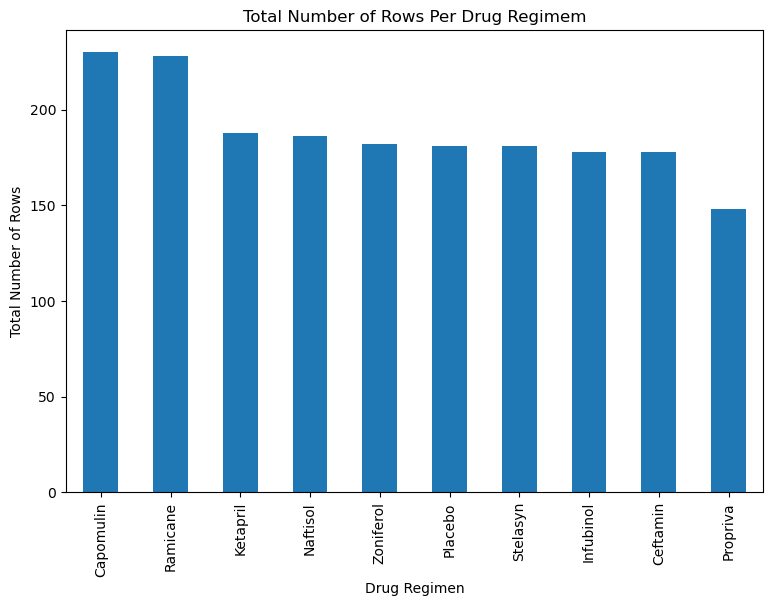

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = clean_mouse_data["Drug Regimen"].value_counts()
total_rows.plot(kind="bar", figsize=(9,6))

plt.title("Total Number of Rows Per Drug Regimem")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.show()                     

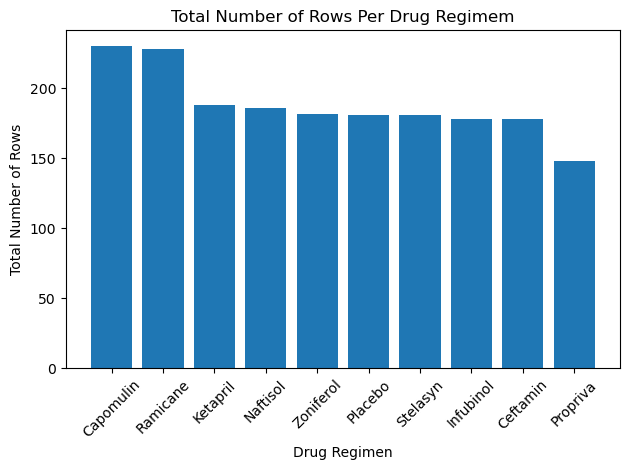

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows = clean_mouse_data["Drug Regimen"].value_counts()
x_axis = total_rows.index.values
y_axis = total_rows.values
plt.bar(x_axis, y_axis, align="center")
plt.xticks(rotation=45)

plt.title("Total Number of Rows Per Drug Regimem")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")

plt.tight_layout()
plt.show()

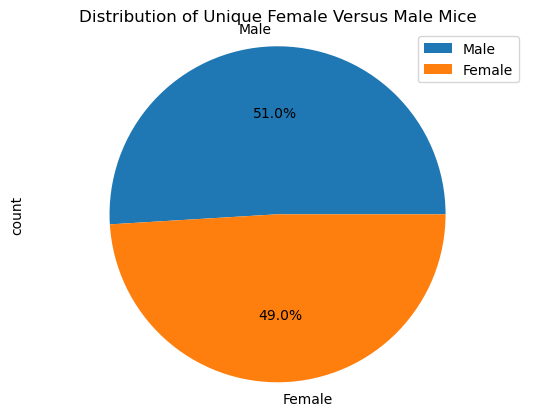

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study            
# Get the unique mice with their gender
clean_mouse_data["Sex"].value_counts()
female_male_counts = clean_mouse_data["Sex"].value_counts()
#female_male_counts 

# Make the pie chart
female_male_counts.plot(kind="pie",autopct="%1.1f%%", legend=True, title="Distribution of Unique Female Versus Male Mice") 

plt.axis("equal")
plt.show()

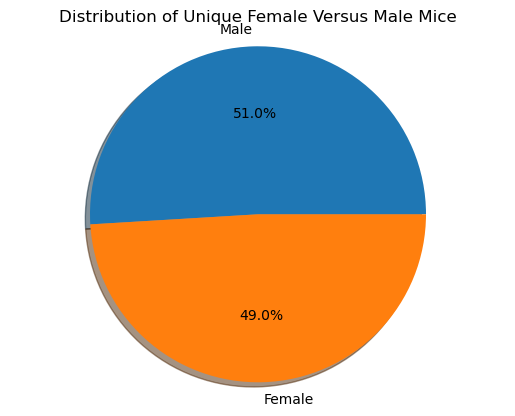

In [25]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
clean_mouse_data["Sex"].value_counts()
female_male_counts = clean_mouse_data["Sex"].value_counts()

# Make the pie chart
labels = female_male_counts.index.values
plt.pie(female_male_counts, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Unique Female Versus Male Mice")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mouse_data.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint

max_tumor = greatest_timepoint.reset_index()
max_tumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_tumor.merge(clean_mouse_data, on=["Mouse ID", "Timepoint"], how="left")	
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol
    
    # add subset
    tumor_vol_list.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    #print(f" {drug}'s potential outliers {outliers}")

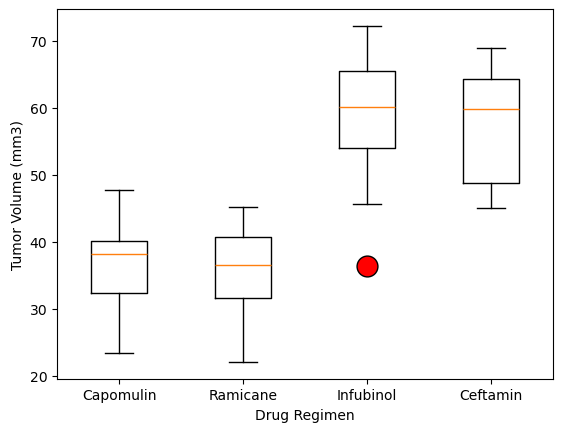

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
outlier = dict(markerfacecolor = "red", markersize=15)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=outlier)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

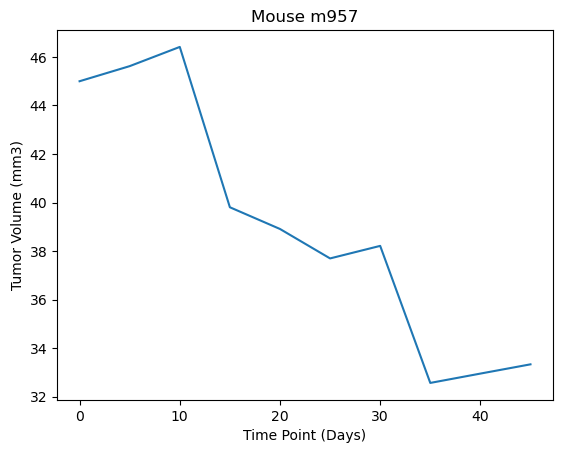

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_mouse_data[clean_mouse_data["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table[capomulin_table["Mouse ID"]=="m957"]
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])

plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Mouse m957")
plt.show

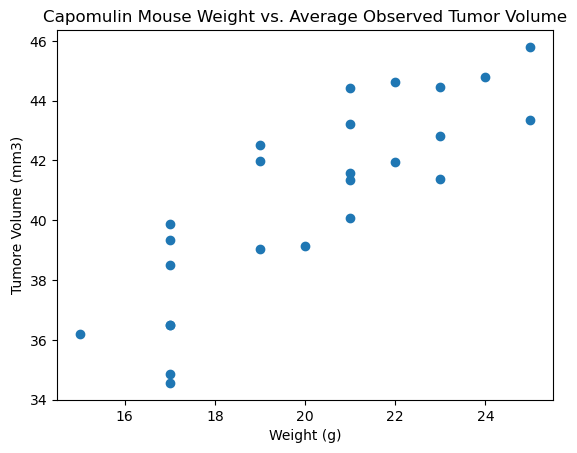

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_mouse_data[clean_mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_table.groupby(["Mouse ID"]).mean(numeric_only=True)
#capomulin_avg
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Tumore Volume (mm3)")
plt.title("Capomulin Mouse Weight vs. Average Observed Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

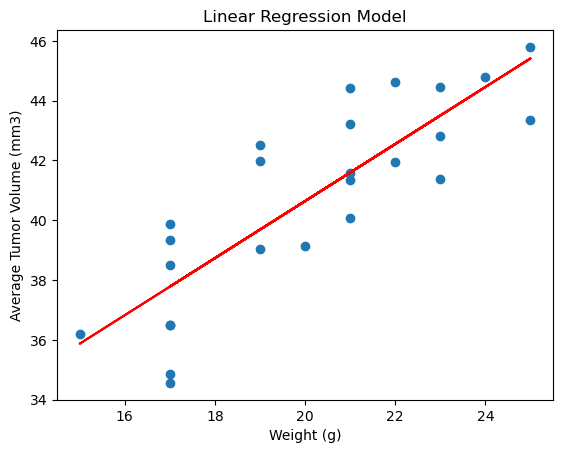

In [40]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_avg["Weight (g)"]
avg_tumor_vol = capomulin_avg["Tumor Volume (mm3)"]
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is {round(correlation[0],2)}")

# linear regression model
x_values = mouse_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.title("Linear Regression Model")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show